# iQuHACK 2025 ⟨😈⁴|🌲⟩

This is a sandbox for ideas. 

## Challenge 1

This is just the basic MaxCut problem. Quick review: 
- Graph $G = (V, E)$, where each $v \in V$ is an employee, and each $e \in E$ is relationship $(v_i, v_j)$ between two employees $v_i, v_j \in V$
- Partition of $V$ denoted as $S, T \subset V$, disjoint
- Objective: $\max |C|$ where $C = \{e \in E | e = (v_i, v_j), \ 
  v_i \in A, v_j \in B\}$

### Workflow

#### Figure out how to really solve MaxCut with varQITE

##### How to make the init ansatz (qcircuit)
1330 - OK I'm already confused with what the build_ansatz thing does

1340 - OK there is this useful .draw method that can draw nice graphs

1340 - note that you can rerun everything using a diff init graph (which is actually the ansatz! think of qchem)

1346 - OK build_ansatz really just makes an qcircuit from scratch based on the params for elements within

##### How to understand the Hamiltonian
1345 - OK im familiar with this-- we are really doing programming (not linear, but quadratic this time, how different could it be?) binary quadratic programming

1346 - max cut edges, translate to math? consider v,w and if vw on same side, binary sum is 0+0=0 and 1+1=0, and diff side we get 0+1=1... ohh it's not strictly binary, fuck it's really 1+1-2×1×1=0 bruh

1400 - now we turn this into H. how: objective $C: \{0,1\}^n \mapsto \mathbb R$
$$H_C |x⟩ = C(x) |x⟩$$
also $|x⟩$ is any one of the "computational basis states" with $n$ qubits
in lawt lang, this just means $e_i$ and so on. (Note there are $2^n$ of these)

1430 - plug in $|x⟩$, gets energy $C(x)$

1432 - translate $x_i$ into $\hat X_j$ which does the same thing but with QC

1434 - plug in everything to get $H_M$, it looks like a blob but it's really just equivalent

1458 - we call it "Ising" (thank you mr scientist)

##### Now we have H! Minimize it with varQITE!
1436 - but what is varQITE? oh damn

1436 - at a glance: varQITE(params_in_qcircuit) -> varQITE(better_params_in_qc)

1437 - better notation: $\mathrm{varQITE}: c_1 ↦ c_2$

1437 - expected value of circuit: $⟨c_1|H|c_1⟩ → ⟨c_2|H|c_2⟩$, minimize

1444 - this is actually really cool, so what really happens in $\mathrm{varQITE}$ is that there is this known (explicit) system of ODEs, parametrized by
1. $∇c_i$ and
2. $⟨c_i|O_?|c_i⟩$ for some? idk whatitis operators related to $H_M$ probably some features of it

- the theory behind this is solid and sound, probably too advanced for us to understand, and this is where the legendary **imaginary time evolution** comes in!!!!!! Details in original paper
- this process, I repeat, is good, bc it does NOT invoke an entire ~~classical optimizer~~, rather it's purely qcircuit (with minimal post-processing done classically but that's totally fine frfr)

1455 - OK. NOW THE REAL GRIND IS COMING. THE CODEEEEEE

##### Theory is in place, let's see the code for QITE

1456 - core features: 
1. finite differences (bruh) to estimate $∇c_i$ ------ can't do analytically?
2. then performs gradient descent (bruh) ------ conjugate gradient better?
- ok maybe just forgive this bc it said it's "simplified"
- CREDIT: IonQ × ORNL

class QIT Evolver

initialization
- hamiltonian, $H_M$ as SparsePauliOp (get from `build_maxcut_hamiltonian`)
- ansatz, container containing $c_i$ as QuantumCircuit (get from `build_ansatz`)
1. init some trackers
   1. backend, external method "AerSimulator" wtf that is
   2. n_shots = 10000, MAX_ITERATIONS_ALLOWED_THEN_WE_EXPLODE
   3. boooookkkkkeeeeping: 
      1. energies, $⟨|⟩$
      2. param_vals, $c_i$
      3. runtime, ?

evolve
// where the real sh!t comes in, ITERATE. 
- n_steps
- lr = 0.4 ???
- verbose, for debug

curr_params = np.zeros(self.ansatz.num_parameters)

// init with 00000000000000 ok $\mathbf c_0 = \mathbf 0$

for loop that does this n_steps times **CORE ITERATION**
1. get iteration circuits, the cool helper qcircuit that pushes $c_i$
2. feed 1. into job backend, max 10000 **QUANTUM MAGIC**
3. measure (also track time we took, time.time bruh)
4. with measurements, feed into ODE system that we promised existed
   1. get defining ode
5. get $∆c_i$ from doing a weird regression with stuff from (4)
6. update $c_{i+1} = c_i + 0.4 × ∆c_i$ ------ ok so this is the 0.4
7. report what we have: measurements, $E$, $c_i$, time elapsed...

additional black boxes:
- get defining ode, this is the theory-heavy magic with imaginary time and stuff
- get iter circuits, helper qcircuits for optimization (not classic: approval)
- plot convergence, this is useful, track minimization process
- print status, end run stats, give in df
- compute cut size, OUR METRIC FOR IFWEDIDTHEPROBLEMRIGHT
- get ising energies, used in ode black box, also below: (so this does the braket stuff)
- expected energy, does $⟨c_i|H_m|c_i⟩$ that we are interested in
- interpret solution, GIVES EASY GRAPH FOR HOW WE ARE PARTITIONING THINGS

1522 - Now we are set to sail. 

Virgin voyage: 

#### OK I guess I know what is happening now, turn on the QC

##### Hello world
1540 - first run using default settings just given to use in the ipynb

wall time: 1:26.8

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>curr_energy</th>
      <th>num_circuits</th>
      <th>quantum_exec_time</th>
    </tr>
    <tr>
      <th>step</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-7.9938</td>
      <td>33</td>
      <td>1.969733</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-8.4206</td>
      <td>33</td>
      <td>1.758635</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-8.6676</td>
      <td>33</td>
      <td>1.813183</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-8.8872</td>
      <td>33</td>
      <td>1.757571</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-8.8042</td>
      <td>33</td>
      <td>1.745554</td>
    </tr>
    <tr>
      <th>5</th>
      <td>-8.8874</td>
      <td>33</td>
      <td>1.752187</td>
    </tr>
    <tr>
      <th>6</th>
      <td>-9.0146</td>
      <td>33</td>
      <td>1.762364</td>
    </tr>
    <tr>
      <th>7</th>
      <td>-9.0564</td>
      <td>33</td>
      <td>1.729556</td>
    </tr>
    <tr>
      <th>8</th>
      <td>-9.1458</td>
      <td>33</td>
      <td>1.771916</td>
    </tr>
    <tr>
      <th>9</th>
      <td>-9.2478</td>
      <td>33</td>
      <td>1.720746</td>
    </tr>
    <tr>
      <th>10</th>
      <td>-9.3020</td>
      <td>33</td>
      <td>1.796445</td>
    </tr>
    <tr>
      <th>11</th>
      <td>-9.3384</td>
      <td>33</td>
      <td>1.739193</td>
    </tr>
    <tr>
      <th>12</th>
      <td>-9.3630</td>
      <td>33</td>
      <td>1.758206</td>
    </tr>
    <tr>
      <th>13</th>
      <td>-9.4504</td>
      <td>33</td>
      <td>1.815102</td>
    </tr>
    <tr>
      <th>14</th>
      <td>-9.4888</td>
      <td>33</td>
      <td>2.138179</td>
    </tr>
    <tr>
      <th>15</th>
      <td>-9.5058</td>
      <td>33</td>
      <td>2.307860</td>
    </tr>
    <tr>
      <th>16</th>
      <td>-9.5764</td>
      <td>33</td>
      <td>2.205344</td>
    </tr>
    <tr>
      <th>17</th>
      <td>-9.5892</td>
      <td>33</td>
      <td>2.365428</td>
    </tr>
    <tr>
      <th>18</th>
      <td>-9.6184</td>
      <td>33</td>
      <td>2.218335</td>
    </tr>
    <tr>
      <th>19</th>
      <td>-9.6454</td>
      <td>33</td>
      <td>2.216295</td>
    </tr>
    <tr>
      <th>20</th>
      <td>-9.6804</td>
      <td>33</td>
      <td>2.227278</td>
    </tr>
    <tr>
      <th>21</th>
      <td>-9.6734</td>
      <td>33</td>
      <td>2.212050</td>
    </tr>
    <tr>
      <th>22</th>
      <td>-9.7156</td>
      <td>33</td>
      <td>2.232246</td>
    </tr>
    <tr>
      <th>23</th>
      <td>-9.7434</td>
      <td>33</td>
      <td>2.188918</td>
    </tr>
    <tr>
      <th>24</th>
      <td>-9.7470</td>
      <td>33</td>
      <td>2.259343</td>
    </tr>
    <tr>
      <th>25</th>
      <td>-9.7680</td>
      <td>33</td>
      <td>2.211080</td>
    </tr>
    <tr>
      <th>26</th>
      <td>-9.7794</td>
      <td>33</td>
      <td>2.275949</td>
    </tr>
    <tr>
      <th>27</th>
      <td>-9.8022</td>
      <td>33</td>
      <td>2.266322</td>
    </tr>
    <tr>
      <th>28</th>
      <td>-9.8008</td>
      <td>33</td>
      <td>2.382219</td>
    </tr>
    <tr>
      <th>29</th>
      <td>-9.8248</td>
      <td>33</td>
      <td>2.274584</td>
    </tr>
    <tr>
      <th>30</th>
      <td>-9.8330</td>
      <td>33</td>
      <td>2.153247</td>
    </tr>
    <tr>
      <th>31</th>
      <td>-9.8358</td>
      <td>33</td>
      <td>2.237209</td>
    </tr>
    <tr>
      <th>32</th>
      <td>-9.8502</td>
      <td>33</td>
      <td>2.171250</td>
    </tr>
    <tr>
      <th>33</th>
      <td>-9.8494</td>
      <td>33</td>
      <td>2.258965</td>
    </tr>
    <tr>
      <th>34</th>
      <td>-9.8660</td>
      <td>33</td>
      <td>2.154240</td>
    </tr>
    <tr>
      <th>35</th>
      <td>-9.8686</td>
      <td>33</td>
      <td>2.341120</td>
    </tr>
    <tr>
      <th>36</th>
      <td>-9.8820</td>
      <td>33</td>
      <td>2.279349</td>
    </tr>
    <tr>
      <th>37</th>
      <td>-9.8994</td>
      <td>33</td>
      <td>2.320610</td>
    </tr>
    <tr>
      <th>38</th>
      <td>-9.9102</td>
      <td>33</td>
      <td>2.365271</td>
    </tr>
  </tbody>
</table>
</div>

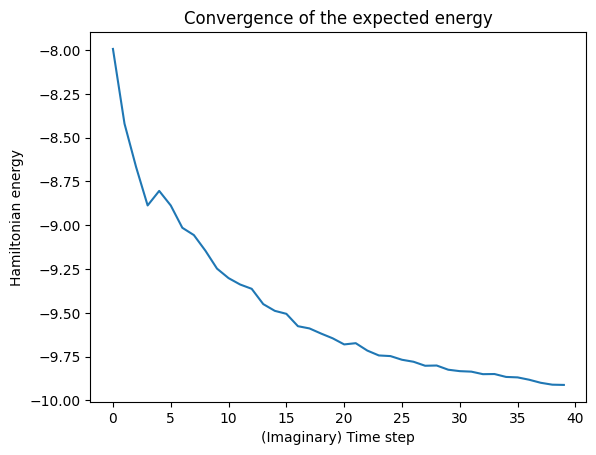

##### We're not done -ϵ϶ı∪ℏϵ϶ϝℏ∪- we need "wavefunction analysis"

1547 - recall, what we have done so far:
1. Construct $H_M$, that once minimized wrt energy, yields sth related to $C(x)$
2. $C(x)$ counts the number of cut edges, given an initial graph $x$

1612 - results show that we got 10/12 correct on that run... what about we take a large number of samples? 


Base score: 0.00037

Balanced score: 0.0

Connected score: 0.52922

1616 - OK, 5.5 hours has elapsed since the hackathon and I have finally walked through the process

## WARNINGS
- DO NOT rename functions
  - Keep **within** scope
- DO NOT import external libraries
  - You're supposed to use Qiskit
  - Implement any needed algorithms locally
- DO NOT solve classically

## HOW TO WIINNNNNNN
- Solution distribution should be correct in the first place
- **Minimize: gate count**
- Comply with reporting standards at the end
  - 10 MB file limit
  - https://forms.gle/tAjnUd7b5t3oX3b2A

## Challenge 2

Additional constraint: we need balanced people
- $|A| = |B|$

## Challenge 3

Additional constraint to C1 (C2 not required): 
- Connectivity of the two subgraphs. 
  - Let $G = (A, F)$, where $\forall (a_1, a_2) \in A, \exists (f_1, f_2, \ldots, f_k)$ such that *ok I'm too lazy to define "path"*
  

## Challenge EX

Educate others on the iQuHACK 2025-IonQ GitHub discussions page about this. Best post may win a prize lol. 